In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file={
    "oi_a0.1_90_10": ["4gram_ordered_inbound_alpha0.1_1to5_90_10"],
#     "ri_a0.1_90_10": ['3gram_random_alpha0.1_1to5_train(90)_test(10)']
}

df_all = pd.DataFrame(columns=['name','window_size', 'word_count', 'prob_words', 'perplexity','h_words', 'h_wordset', 'h_wordorder', 'entropy_rate', 'unordered_entropy_rate', 'entropy_rate_difference','perplexity'])
c = 0
for k,v in file.items():
    df = pd.read_csv(file[k][0])
    if k[len(k)-2:len(k)-1] == str(4):
        df['word_count'] = pd.Series([576673,576673,576673,576673,576673])
    elif k[len(k)-3:len(k)-1] == str(10):
        df['word_count'] = pd.Series([1313930,1313930,1313930,1313930,1313930])
    elif k[len(k)-3:len(k)-1] == str(50):
        df['word_count'] = pd.Series([6407228,6407228,6407228,6407228,6407228])
    else:
        df['word_count'] = pd.Series([0,0,0,0,0])
    
    df['prob_words'] = pd.Series(2**(-df['h_words']))
    df['window_size'] =  pd.Series([1,2,3,4,5])
    df['name'] = pd.Series([k,k,k,k,k])
    df['h_wordorder'] = pd.Series(df['h_words'] - df['h_wordset'])
    df['entropy_rate'] = pd.Series(df['h_words'] / df['window_size'])
    df['perplexity'] = pd.Series(2**df['entropy_rate'])
    df['unordered_entropy_rate'] = pd.Series(df['h_wordset'] / df['window_size'])
    df['entropy_rate_difference'] = pd.Series((df['h_words'] - df['h_wordset']) / df['window_size'])
#     df['perplexity'] = pd.Series(df['prob_words']**(-1/df['word_count']))
    del df['Unnamed: 0']
    for i in range(5):
        df_all.loc[5*c + i] = df.loc[i]
#     if c == 0:
#         print(df)
    c+=1

# df_all[df_all['name'] == ('oi_a0.1')]
df_all


,name,window_size,word_count,prob_words,perplexity,h_words,h_wordset,h_wordorder,entropy_rate,unordered_entropy_rate,entropy_rate_difference,perplexity
0,oi_a0.1_90_10,1,0,8.936309e-03,111.903023,6.806105,6.806105,0.000000,6.806105,6.806105,0.000000,111.903023
1,oi_a0.1_90_10,2,0,1.238632e-04,89.852232,12.978965,12.469957,0.509008,6.489482,6.234978,0.254504,89.852232
2,oi_a0.1_90_10,3,0,6.148875e-07,117.598411,20.633174,18.948929,1.684245,6.877725,6.316310,0.561415,117.598411
3,oi_a0.1_90_10,4,0,1.638468e-09,157.177546,29.185005,26.490321,2.694684,7.296251,6.622580,0.673671,157.177546
4,oi_a0.1_90_10,5,0,4.364007e-12,187.078081,37.737484,34.478549,3.258935,7.547497,6.895710,0.651787,187.078081


In [3]:
file={
    "oi_a0_(4)",    "ri_a0_(4)",
    "oi_a0.01_(4)", "ri_a0.01_(4)",  "ot_ow_i_a0.01_(4)",  "ot_rw_i_a0.01_(4)",  "rt_ow_i_a0.01_(4)",   "rt_rw_i_a0.01_(4)",
    "oi_a0.1_(4)",  "ri_a0.1_(4)",   "ot_ow_i_a0.1_(4)",   "ot_rw_i_a0.1_(4)",   "rt_ow_i_a0.1_(4)",    "rt_rw_i_a0.1_(4)",
    "oi_a0.1_(40)", 
    "oi_a0.25_(4)", "ri_a0.25_(4)",
    "oi_a0.5_(4)",  "ri_a0.5_(4)",
    
    "oi_a0.1_train(90)_test(10)",
    "oo_a0.1_train(90)_test(10)",
    "ri_a0.1_train(10)_test(pride_and_prejudice)",
    "ri_a0.1_train(90)_test(10)",
    
    "oi_a0.1_(40)", 
    "oi_a0.1_(50)",
    "ot_rw_i_a0.1_(40)",

}

[]

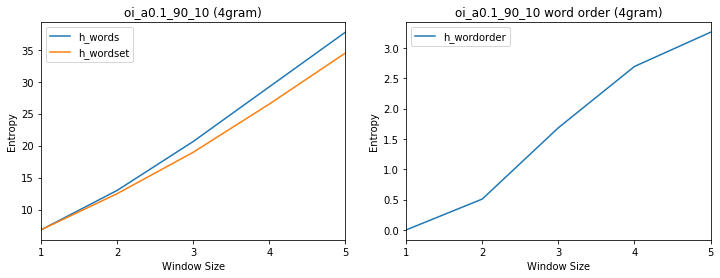

In [6]:
# Compare h_words/h_wordset and word order

name = 'oi_a0.1_90_10'
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (4gram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

TypeError: no numeric data to plot

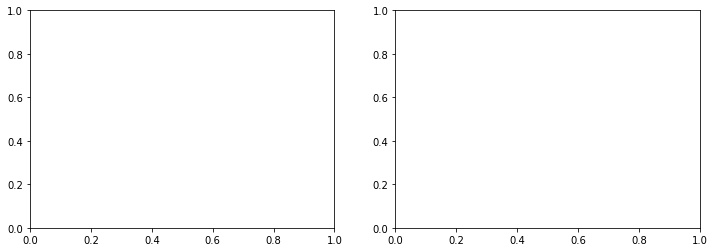

In [13]:
# Compare h_words/h_wordset and word order

name = 'oi_a0.1_(4)'
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (4gram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = 'oi_a0.1_(50)'
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (4gram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


TypeError: no numeric data to plot

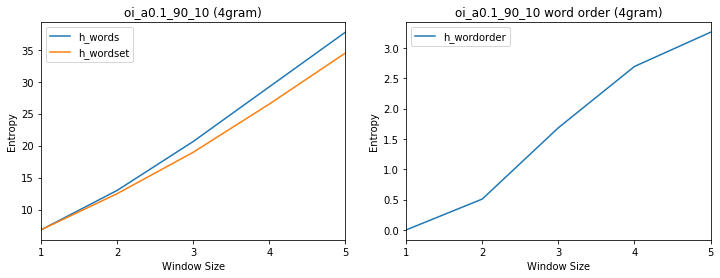

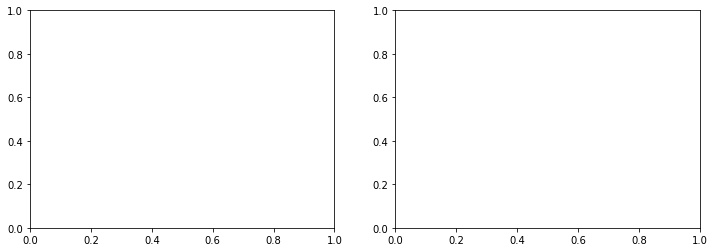

In [14]:
# Compare h_words/h_wordset and word order
name = "oi_a0.1_90_10"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (4gram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "ri_a0.1_90_10"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (4gram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

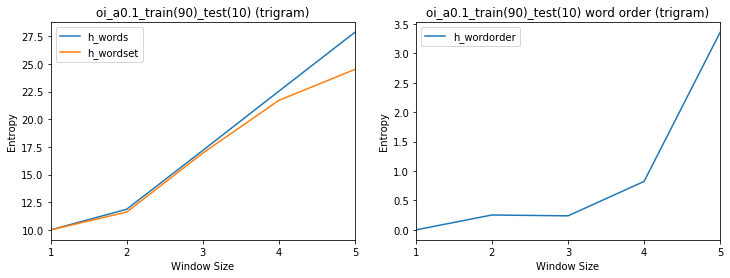

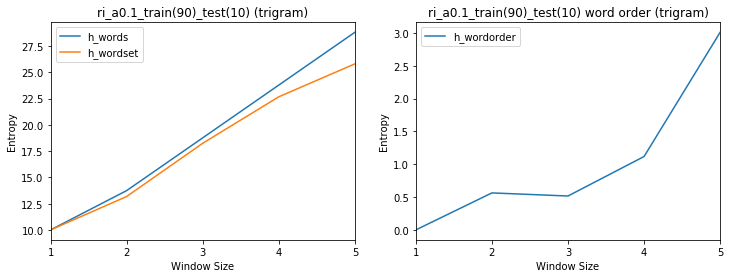

In [5]:
# Compare ordered and random h_words/h_wordset and wordorder

base = 'i_a0.1_train(90)_test(10)'

name = 'o'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

# name = 'r'+base
name = "ri_a0.1_train(90)_test(10)"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=str(name)+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

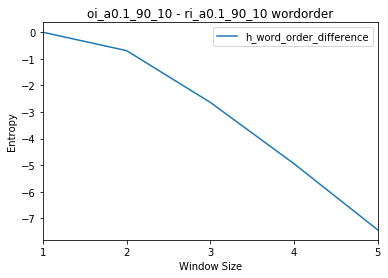

In [12]:
# Compare ordered and random wordorder difference

base = 'i_a0.1_90_10'
df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
name1 = 'o'+base
df1 = df_all[df_all['name'] == name1].copy().reset_index(drop=True)

name2 = 'r'+base
df2 = df_all[df_all['name'] == name2].copy().reset_index(drop=True)

# df['h_word_order_difference'] = df2['h_wordorder'] - df1['h_wordorder']
df['h_word_order_difference'] = df1['h_wordorder'] - df2['h_wordorder']

# axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name2 + " - " + name1 +" wordorder")
axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name1 + " - " + name2 +" wordorder")
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

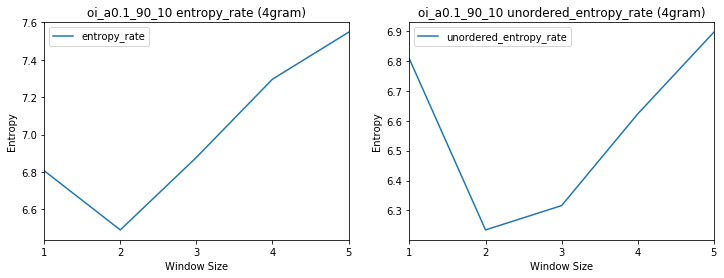

In [8]:
# Compare ordered and unordered entropy rates for random and ordered LM

# base = 'i_a0.1_train('

# name = 'o'+base
name = "oi_a0.1_90_10"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (4gram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

# name = 'r'+base
# df = df_all[df_all['name'] == name].copy()

# fig, ax = plt.subplots(ncols=2,figsize=(12,4))
# axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
# axis.set(xlabel="Window Size", ylabel="Entropy")
# axis.set_xticks(range(1,6,1))

# axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
# axis.set(xlabel="Window Size", ylabel="Entropy")
# axis.set_xticks(range(1,6,1))

# plt.plot()

[]

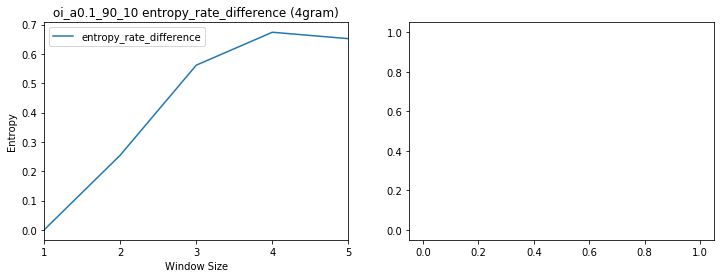

In [11]:
# Compare ordered and unordered entropy rates for random and ordered LM

base = 'i_a0.1_90_10'

name = 'o'+base
name = "oi_a0.1_90_10"
df = df_all[df_all['name'] == name].copy()

# name2 = 'r'+base
# df2 = df_all[df_all['name'] == name2].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate_difference"], title=name+" entropy_rate_difference (4gram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

# axis = df2.plot(x="window_size", y=['entropy_rate_difference'], title=name2+" entropy_rate_difference (4gram)", ax=ax[1])
# axis.set(xlabel="Window Size", ylabel="Entropy")
# axis.set_xticks(range(1,6,1))

plt.plot()


[]

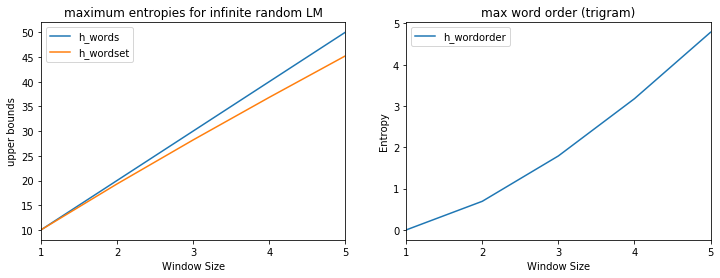

In [11]:
# Get entropy upper bounds given an infinite random LM

import scipy.special

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
# df['h_words'] = 9.781669 * df['window_size'] 
df['h_words'] = 10.001012 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
df['h_wordorder'] = df["h_words"] - df['h_wordset']

fig, ax = plt.subplots(ncols=2,figsize=(12,4))

a = df.plot(x="window_size", y=['h_words', 'h_wordset'], title="maximum entropies for infinite random LM", ax=ax[0])
a.set(xlabel="Window Size", ylabel="upper bounds")
a.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title="max word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

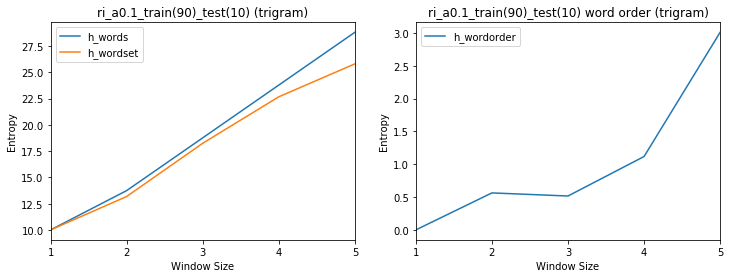

In [10]:
base = 'i_a0.1_train(90)_test(10)'

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()